In [1]:
import pandas as pd

In [25]:
path_1 = 'best_confidence_per_drug.csv'
path_2 = 'results_nmdn.csv'

diff_dock_output = pd.read_csv(path_1)
nmdn_output = pd.read_csv(path_2)
diff_dock_output.head

<bound method NDFrame.head of                                  drug  highest_confidence  within_pocket
0                        Glucarpidase                1.24           True
1                    Arsenic_trioxide                1.05           True
2                         Ferumoxides                0.96           True
3     PT2385_S19_variant_IC50_0_012uM                0.92           True
4                    ZINC000000004264                0.89           True
...                               ...                 ...            ...
2931                  Insulin_detemir               -4.62          False
2932            Human_neutral_insulin               -4.73          False
2933                  Insulin_porcine               -4.73          False
2934                Insulin_glulisine               -4.74          False
2935                   Insulin_aspart               -4.80          False

[2936 rows x 3 columns]>

In [26]:
nmdn_output.sort_values('pKd-Score', ascending=False).head()

,lig,NMDN-Score,pKd-Score
782,all_sdf/2883_PSMA_11_Ga_68.sdf,-inf,8971.619141
2151,all_sdf/1236_Choline_magnesium_trisalicylate.sdf,-2616.947998,13.056052
418,all_sdf/1339_Glatiramer_Acetate.sdf,-5448.751953,12.253439
1229,all_sdf/1361_Indium_In_111_Oxyquinoline.sdf,-996.890869,11.370004
353,all_sdf/1327_Gallium_nitrate.sdf,1199.146484,10.455913


In [27]:
def cleean_name(df):
    for index, row in df.iterrows():
        # Split around '/'
        part = row['lig'].split('/')[-1]
        # Split around '.'
        part = part.split('.')[0]
        # Split around first '_' and take second part
        part = part.split('_', 1)[-1]
        # Update the column 'lig' to 'drug'
        df.at[index, 'drug'] = part
    return df

nmdn_output = cleean_name(nmdn_output)


In [ ]:
# Step 1: Filter out low-quality poses
nmdn_output = nmdn_output[nmdn_output["NMDN-Score"] >= 900]

# Step 2: Sort by pKd-Score descending
nmdn_output = nmdn_output.sort_values("pKd-Score", ascending=False).reset_index(drop=True)

# Step 3: Assign rank numbers
nmdn_output["rank"] = nmdn_output.index + 1



    rank                         drug   NMDN-Score  pKd-Score
0      1              Gallium_nitrate  1199.146484  10.455913
1      2                    Opicapone  1315.727661   7.841500
2      3                  Remimazolam   982.570923   7.059201
3      4  Menadiol_sodium_diphosphate   974.012451   7.038445
4      5                  Nemonapride  1397.451172   6.944401
5      6           Tyropanoate_sodium  1224.890503   6.936443
6      7        Active_26_IC50_0_76uM  3052.364502   6.872869
7      8                   Ulipristal  1247.559692   6.849808
8      9                   Isradipine  1307.531494   6.759768
9     10                 Luliconazole  1992.502930   6.709940
10    11                    Arteether  1306.282227   6.660736
11    12    Active_63_Kd_85nM_IC50_NA  2933.013184   6.648381
12    13                 Nitrendipine  1424.753662   6.596760
13    14             ZINC000000008650  2106.101318   6.575435
14    15                  Roflumilast  1122.558838   6.530491
15    16

In [28]:
def add_label(df):
    labels = []
    for name in df['drug']:
        if name.startswith('Active'):
            labels.append('active')
        elif name.startswith('Inactive'):
            labels.append('inactive')
        elif name.startswith('ZINC'):
            labels.append('decoy')
        else:
            labels.append('library')
    df['label'] = labels
    return df

diff_dock_output = add_label(diff_dock_output)
diff_dock_output.head()


,drug,highest_confidence,within_pocket,label
0,Glucarpidase,1.24,True,library
1,Arsenic_trioxide,1.05,True,library
2,Ferumoxides,0.96,True,library
3,PT2385_S19_variant_IC50_0_012uM,0.92,True,library
4,ZINC000000004264,0.89,True,decoy


In [29]:
nmdn_output = add_label(nmdn_output)
nmdn_output.head(20)

,lig,NMDN-Score,pKd-Score,drug,label
0,all_sdf/1406_Nepafenac.sdf,2138.206787,3.509590,Nepafenac,library
1,all_sdf/0989_ZINC000000000353.sdf,1476.662231,4.444312,ZINC000000000353,decoy
2,all_sdf/1968_Cefoxitin.sdf,823.362610,3.844234,Cefoxitin,library
3,all_sdf/1583_Bretylium.sdf,967.875244,4.638122,Bretylium,library
4,all_sdf/0744_Triamterene.sdf,941.483032,3.386515,Triamterene,library
5,all_sdf/0974_Ceftezole.sdf,924.712769,4.583751,Ceftezole,library
6,all_sdf/0029_Ximelegatran.sdf,1196.939087,2.326810,Ximelegatran,library
7,all_sdf/0750_Technetium_TC_99M_medronate.sdf,1014.290833,4.378359,Technetium_TC_99M_medronate,library
8,all_sdf/1342_Trolamine_salicylate.sdf,1277.288086,5.774091,Trolamine_salicylate,library
9,all_sdf/0904_Apraclonidine.sdf,1348.648682,4.667990,Apraclonidine,library


### Calculating EF1%

In [32]:

def calculate_ef1_by_rank(df, label_col='label', active_label='active'):
    """
    Calculate EF1% (Enrichment Factor at 1%) using only ranks and labels.
    """
    n_total = len(df)
    n_top = max(1, int(n_total * 0.01))
    n_active = (df[label_col] == active_label).sum()
    # Top 1% by rank (i.e., first n_top rows)
    n_active_top = (df.iloc[:n_top][label_col] == active_label).sum()
    if n_active == 0:
        return float('nan')
    ef1 = (n_active_top / n_top) / (n_active / n_total)
    return ef1

# Ensure both dataframes are sorted by rank (i.e., their current order)
ef1_diffdock = calculate_ef1_by_rank(diff_dock_output, label_col='label', active_label='active')
ef1_nmdn = calculate_ef1_by_rank(nmdn_output, label_col='label', active_label='active')

print(f"EF1% for DiffDock: {ef1_diffdock:.3f}")
print(f"EF1% for NMDN: {ef1_nmdn:.3f}")


EF1% for DiffDock: 12.655
EF1% for NMDN: 9.920


In [55]:
# Calculate EF1% for inactive compounds
ef1_diffdock_inactive = calculate_ef1_by_rank(diff_dock_output, label_col='label', active_label='inactive')
ef1_nmdn_inactive = calculate_ef1_by_rank(nmdn_output, label_col='label', active_label='inactive')

print(f"EF1% for DiffDock (inactive): {ef1_diffdock_inactive:.3f}")
print(f"EF1% for NMDN (inactive): {ef1_nmdn_inactive:.3f}")

EF1% for DiffDock (inactive): 22.498
EF1% for NMDN (inactive): 0.000


In [33]:
def calculate_ef10_by_rank(df, label_col='label', active_label='active'):
    """
    Calculate EF10% (Enrichment Factor at 10%) using only ranks and labels.
    """
    n_total = len(df)
    n_top = max(1, int(n_total * 0.10))
    n_active = (df[label_col] == active_label).sum()
    # Top 10% by rank (i.e., first n_top rows)
    n_active_top = (df.iloc[:n_top][label_col] == active_label).sum()
    if n_active == 0:
        return float('nan')
    ef10 = (n_active_top / n_top) / (n_active / n_total)
    return ef10

# Ensure both dataframes are sorted by rank (i.e., their current order)
ef10_diffdock = calculate_ef10_by_rank(diff_dock_output, label_col='label', active_label='active')
ef10_nmdn = calculate_ef10_by_rank(nmdn_output, label_col='label', active_label='active')

print(f"EF10% for DiffDock: {ef10_diffdock:.3f}")
print(f"EF10% for NMDN: {ef10_nmdn:.3f}")

EF10% for DiffDock: 6.889
EF10% for NMDN: 6.574


In [34]:
nmdn_output.head(50)

,lig,NMDN-Score,pKd-Score,drug,label,rank
0,all_sdf/1327_Gallium_nitrate.sdf,1199.146484,10.455913,Gallium_nitrate,library,1
1,all_sdf/1217_Opicapone.sdf,1315.727661,7.841500,Opicapone,library,2
2,all_sdf/2341_Remimazolam.sdf,982.570923,7.059201,Remimazolam,library,3
3,all_sdf/1484_Menadiol_sodium_diphosphate.sdf,974.012451,7.038445,Menadiol_sodium_diphosphate,library,4
4,all_sdf/1495_Nemonapride.sdf,1397.451172,6.944401,Nemonapride,library,5
5,all_sdf/1867_Tyropanoate_sodium.sdf,1224.890503,6.936443,Tyropanoate_sodium,library,6
6,all_sdf/0202_Active_26_IC50_0_76uM.sdf,3052.364502,6.872869,Active_26_IC50_0_76uM,active,7
7,all_sdf/1872_Ulipristal.sdf,1247.559692,6.849808,Ulipristal,library,8
8,all_sdf/1304_Isradipine.sdf,1307.531494,6.759768,Isradipine,library,9
9,all_sdf/1092_Luliconazole.sdf,1992.502930,6.709940,Luliconazole,library,10


In [35]:
diff_dock_output.head(50)

,drug,highest_confidence,within_pocket,label
0,Glucarpidase,1.24,True,library
1,Arsenic_trioxide,1.05,True,library
2,Ferumoxides,0.96,True,library
3,PT2385_S19_variant_IC50_0_012uM,0.92,True,library
4,ZINC000000004264,0.89,True,decoy
5,PT_2385_IC50_0_012uM,0.88,True,library
6,Rilmenidine,0.85,True,library
7,Active_70_SPA_IC50_0_16uM,0.85,True,active
8,Active_51_Kd_327nM_IC50_NA,0.84,True,active
9,Strontium_Chloride_Sr_89,0.82,True,library


## Visualization

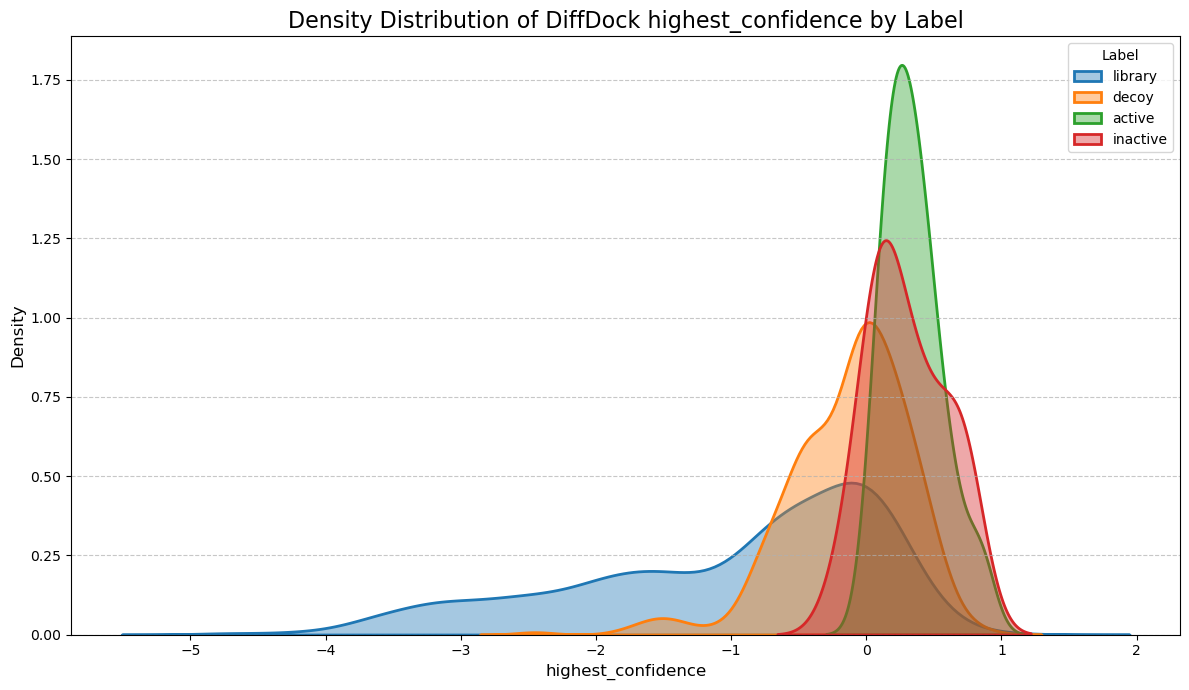

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create visualization for DiffDock data
plt.figure(figsize=(12, 7))

# Get the list of unique labels to plot for DiffDock
unique_labels = diff_dock_output['label'].unique()

# Loop through each label and plot its KDE for DiffDock
for label in unique_labels:
    # Select the data for the current label
    subset = diff_dock_output[diff_dock_output['label'] == label]
    
    # Plot the distribution for this subset, giving it a label for the legend
    sns.kdeplot(
        subset['highest_confidence'], 
        label=label,  # This is the key part for the legend
        fill=True, 
        alpha=0.4, 
        linewidth=2
    )

# Add titles and labels
plt.title('Density Distribution of DiffDock highest_confidence by Label', fontsize=16)
plt.xlabel('highest_confidence', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Create the legend that maps colors to labels
plt.legend(title='Label') 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

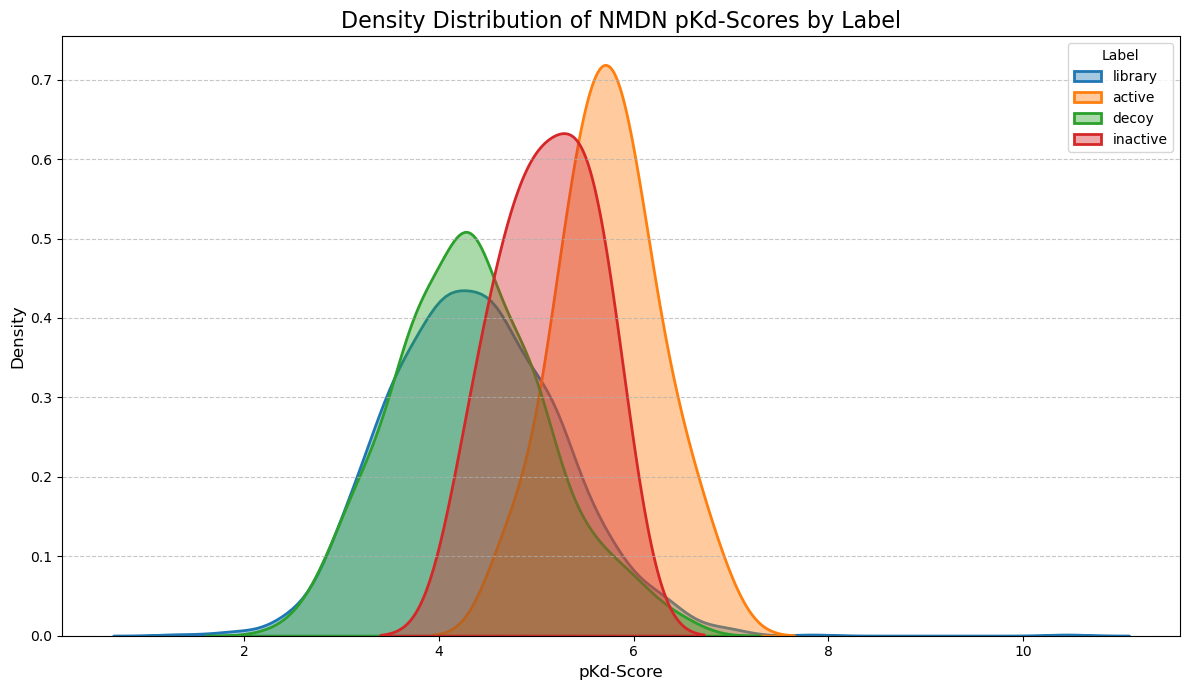

In [44]:
# Create visualization for NMDN data
plt.figure(figsize=(12, 7))

# Get the list of unique labels to plot for NMDN
unique_labels_nmdn = nmdn_output['label'].unique()

# Loop through each label and plot its KDE for NMDN
for label in unique_labels_nmdn:
    # Select the data for the current label
    subset = nmdn_output[nmdn_output['label'] == label]
    
    # Plot the distribution for this subset, giving it a label for the legend
    sns.kdeplot(
        subset['pKd-Score'], 
        label=label,  # This is the key part for the legend
        fill=True, 
        alpha=0.4, 
        linewidth=2
    )

# Add titles and labels
plt.title('Density Distribution of NMDN pKd-Scores by Label', fontsize=16)
plt.xlabel('pKd-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Create the legend that maps colors to labels
plt.legend(title='Label') 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

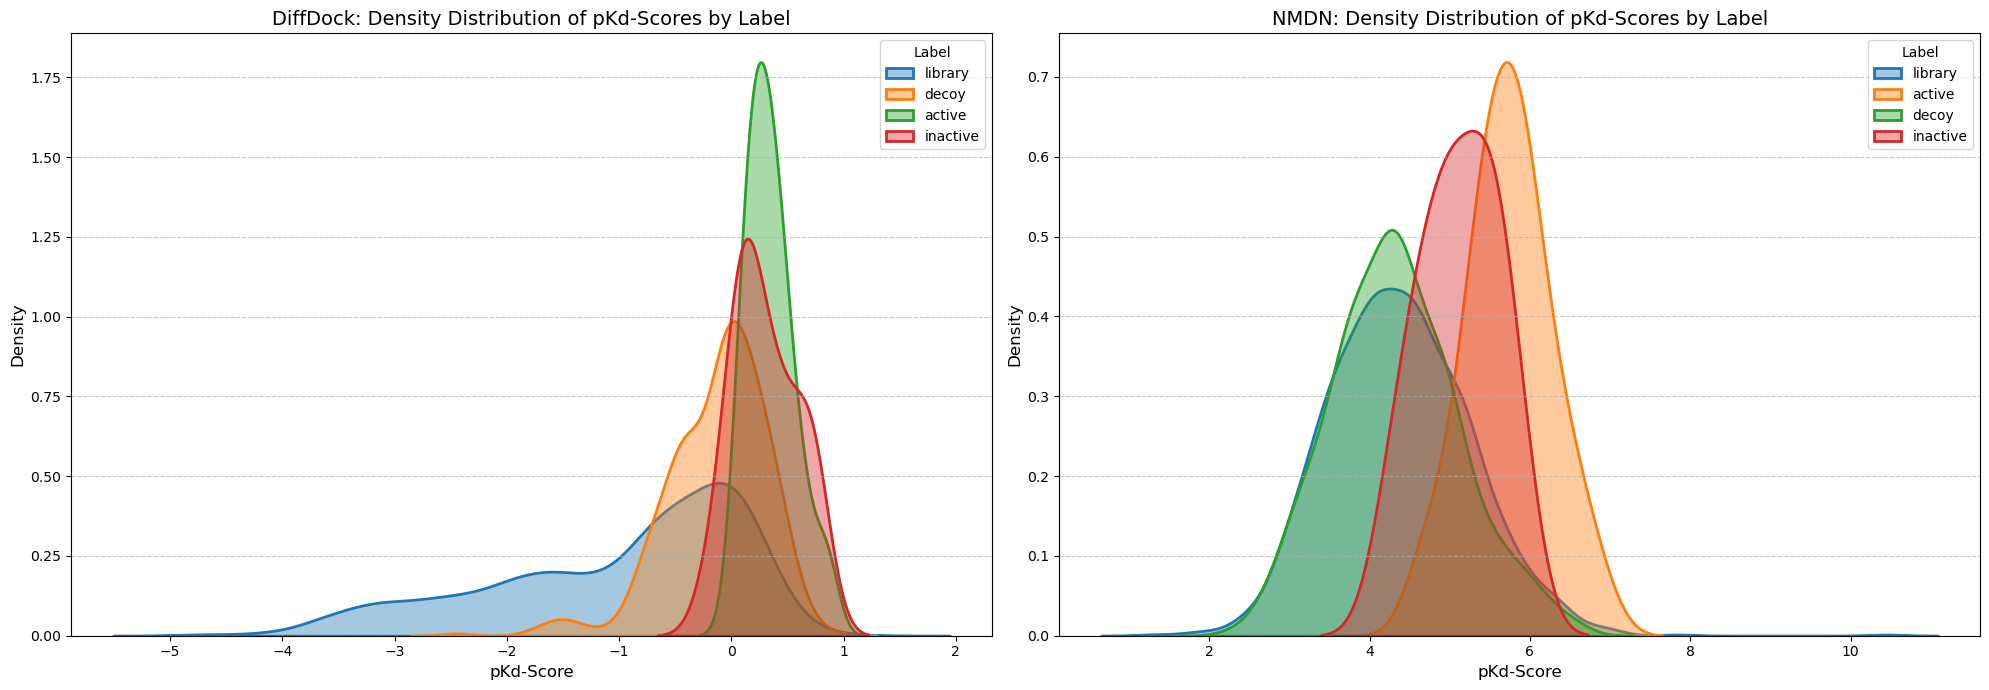

In [45]:
# Create side-by-side comparison visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# DiffDock plot
for label in diff_dock_output['label'].unique():
    subset = diff_dock_output[diff_dock_output['label'] == label]
    sns.kdeplot(
        subset['highest_confidence'], 
        label=label,
        fill=True, 
        alpha=0.4, 
        linewidth=2,
        ax=ax1
    )

ax1.set_title('DiffDock: Density Distribution of pKd-Scores by Label', fontsize=14)
ax1.set_xlabel('pKd-Score', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.legend(title='Label')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# NMDN plot
for label in nmdn_output['label'].unique():
    subset = nmdn_output[nmdn_output['label'] == label]
    sns.kdeplot(
        subset['pKd-Score'], 
        label=label,
        fill=True, 
        alpha=0.4, 
        linewidth=2,
        ax=ax2
    )

ax2.set_title('NMDN: Density Distribution of pKd-Scores by Label', fontsize=14)
ax2.set_xlabel('pKd-Score', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.legend(title='Label')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()